In [93]:
direct = open("direct_map.csv","r").readlines()
inverse = open("inverse_map.csv", "r").readlines()

In [107]:
direct_s = [x.split(',') for x in direct]
inverse_s = [x.split(',') for x in inverse]

In [108]:
def fix(s):
    s[0] = int(s[0],2)
    s[1] = int(s[1])
    s[2] = int(s[2])
    return s

In [109]:
direct_s = [fix(x) for x in direct_s]
inverse_s = [fix(x) for x in inverse_s]

In [112]:
direct_s_sorted = sorted(direct_s, key=lambda x:x[0])
inverse_s_sorted = sorted(inverse_s, key=lambda x:x[0])

In [122]:
i = 0
j = 0
matches = {}
while i<len(direct_s_sorted) and j < len(inverse_s_sorted):
    if direct_s_sorted[i][0] == inverse_s_sorted[j][0]:
        matches[(direct_s_sorted[i][1], direct_s_sorted[i][2])] = (inverse_s_sorted[j][1], inverse_s_sorted[j][2])
        i = i + 1
    
    elif direct_s_sorted[i][0] < inverse_s_sorted[j][0]:
        i = i + 1
    
    else:
        while inverse_s_sorted[j][0] < direct_s_sorted[i][0] and j < len(inverse_s_sorted):
            j = j + 1
            
print matches

{(266, 351): (1304, 2029), (342, 418): (987, 1946), (199, 495): (874, 2251), (275, 487): (883, 2109), (247, 483): (912, 2157), (256, 456): (997, 2126), (189, 422): (1095, 2236), (371, 575): (1503, 1667), (228, 412): (1153, 2154), (468, 611): (1551, 1158), (327, 472): (869, 2008), (313, 378): (1140, 1969), (260, 407): (1157, 2089), (320, 426): (1011, 1992), (269, 479): (913, 2115), (255, 522): (777, 2164), (222, 464): (979, 2193), (259, 358): (1309, 2051), (464, 536): (1475, 1216), (204, 476): (936, 2233), (164, 425): (1057, 2287), (203, 389): (1205, 2195), (443, 626): (1566, 1289), (212, 445): (1039, 2203), (200, 513): (818, 2259), (251, 401): (1185, 2102), (288, 389): (1168, 2023), (350, 455): (880, 1958), (207, 378): (1240, 2184), (283, 410): (1118, 2048), (456, 630): (1573, 1215), (292, 452): (976, 2058), (331, 438): (958, 1980), (248, 504): (843, 2167), (197, 449): (1019, 2233), (193, 501): (853, 2265), (273, 497): (853, 2118), (206, 433): (1075, 2208), (245, 469): (959, 2153), (42

In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [212]:
X = []
Y = []
Z = []
distortion_map = open("distortion.txt", "w")
for k in matches:
    if k[0]<350 and k[1] > 300:
        distortion_map.write(str(k[0])+" "+str(k[1]))
        distortion_map.write(" ")
        distortion_map.write(str(int(matches[k][0]/4.5))+ " " + str(int(matches[k][1]/6.)))
        distortion_map.write("\n")
    X.append(k[0])
    Y.append(k[1])
    _s = matches[k][0]/4.5
    _t = matches[k][1]/6.
    d = np.sqrt((k[0]-_s)**2 + (k[1]-_t)**2)
    Z.append(d)
    
distortion_map.close()

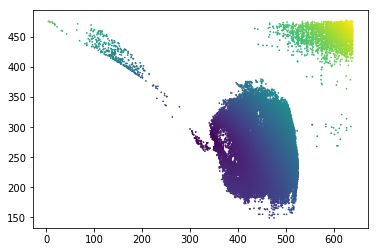

In [138]:
plt.scatter(Y,X,0.5,Z)

In [142]:
import cv2

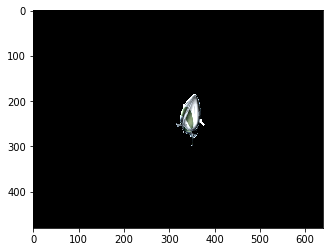

In [233]:
#im = cv2.imread("../structured_calib/image_14.BMP")
im = cv2.imread("test.png")
plt.imshow(im)

In [248]:
dist_im = np.zeros(im.shape)
distortions = open("distortion.txt","r").readlines()
for disto in distortions:
    distortion = disto.split(' ')
    s = int(distortion[0])
    t = int(distortion[1])
    u = int(distortion[2])
    v = int(distortion[3])
    dist_im[s,t] = [u/(float(im.shape[0])),v/(float(im.shape[1])),0]

dist_im_blur = cv2.GaussianBlur(dist_im, (3,3), 2, 2)

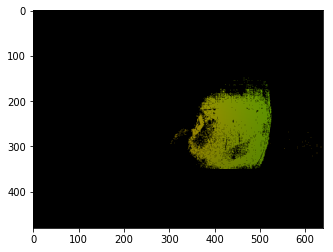

In [249]:
plt.imshow(dist_im_blur)

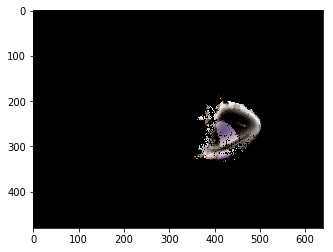

In [252]:
im2 = np.zeros(im.shape)

#im2 = im.copy()
distortions = open("distortion.txt","r").readlines()
for disto in distortions:
    distortion = disto.split(' ')
    s = int(distortion[0])
    t = int(distortion[1])
    u = int(distortion[2])
    v = int(distortion[3])
    im2[s,t] = im[u,v]
    
#for i in range(im2.shape[0]):
#    for j in range(im2.shape[1]):
#        if np.sum(im2[i,j])==0:
#            count = 0
#            if i >= 1:
#                im2[i,j] = im2[i,j] + im2[i-1,j]
#                count = count+1
#            if i<im2.shape[0]-1:
#                im2[i,j] = im2[i,j] + im2[i+1,j]
#                count = count+1
#            if j >= 1:
#                im2[i,j] = im2[i,j] + im2[i,j-1]
#                count = count+1
#            if j<im2.shape[1]-1:
#                im2[i,j] = im2[i,j] + im2[i,j+1]
#                count = count+1
#            im2[i,j] = im2[i,j]/float(count)
    

cv2.imwrite('final.png', im2)
plt.imshow(im2)

In [244]:
im3 = cv2.GaussianBlur(im2, (7,7), 2,2)

In [245]:
cv2.imwrite('final_blur.png', im3)

True